Today

* Building a sign language interpreter
* There will be one model interpreting the scene and one interpreting the digit
* What'll it interpret? were going to start of simple with hand written digits! They will use the famous Mnist data set to train on

Setup: IMPORTANT! Turn On Internet

* On the right-hand side of this notebook, there's a section called "Session Options".
*  Scroll down to the "Internet" toggle. Turn it on. You may need to verify your phone number.
* Additionally, to help this run faster, you can also enable some GPU access

Using Jupyter:

* This is a Jupyter notebook. It contains cells. There are 2 kinds of cells - markdown and Python. Markdown cells are * * like this one, and are just there to give you information. Python cells run code. You can run a cell with Ctrl + Enter * or run a cell and move the next one with Shift + Enter. Try running the cell below.

In [1]:
print('Ctrl + Enter runs this cell!')
output = 'The last line of a cell is printed by default'
output

Ctrl + Enter runs this cell!


'The last line of a cell is printed by default'

What YOU Need To Do

There are places to write code, indicated by ... and a comment with TODO: in a python cell. You should fill these in * or nothing will work! If you have any questions, just ask one of the EdinburghAI people :)

There are points to stop and think indicated by Think🤔. Please stop, think, maybe write an answer, and discuss with those around you.

There are also questions labelled Extension😈. These are more optional, and are for those of you who might have done some similar stuff before. Feel free to have a think about these questions though!

Good luck!

In [3]:
# First we need to import our model and tools. This may take a couple of minutes to download all the images
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# next we need to normalise our data
# we will need to make sure our pixel values range from 0 - 1 as thats what our model works with
x_train, x_test = x_train / 255.0, x_test / 255.0

# we also need to flatten the images as our model takes a vector i.e. (28x28 -> 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [9]:
# now we will need to define our model architecture. to do this we want to make a feed_forward nureal network
# however have a play about with model params, youll be surprised how few neurons we need for this 
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),  # Input layer comes first
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# and compile the model using our friend adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # this is just a design choice
              metrics=['accuracy'])                   # we care about accuracy!

In [10]:
# now the fun part, training and more importantly testing!
# to train the model we use the .fit() function with our normalised data
# for each epoch watch the loss go DOWN and the val_accuracy go UP
# focus on the val_accuracy as that is our unseen data!
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# a final evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy (%):", test_acc*100)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8449 - loss: 0.5182 - val_accuracy: 0.9567 - val_loss: 0.1474
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9606 - loss: 0.1325 - val_accuracy: 0.9659 - val_loss: 0.1124
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0952 - val_accuracy: 0.9718 - val_loss: 0.0935
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9777 - loss: 0.0732 - val_accuracy: 0.9698 - val_loss: 0.0971
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9817 - loss: 0.0584 - val_accuracy: 0.9728 - val_loss: 0.0907
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0498 - val_accuracy: 0.9735 - val_loss: 0.0910
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0415 - val_accuracy: 0.9757 - val_loss: 0.0859
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0353 - 

The next part of this excercise is the image processing part
To do this we are going to use an already trained CNN which will track our index finger as we move it around our video.
There is some fiddly data processing steps here which we have filled out so dont worry if the code looks a little.. long

In [1]:
!pip install mediapipe opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 41.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 4.25.6 which is incompatible.
google-cloud-bigtable 2.27.0 requires google-api-core[grpc]<3.0.0dev,>=2.16.0, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tens

In [2]:
# now we have A LOT of imports
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
import numpy as np
import torch
import time
from concurrent.futures import ThreadPoolExecutor
import threading
from IPython.display import Image, display
from IPython.display import clear_output

In [4]:

class handDetector2:
    def __init__(self, mode=False, maxHands=2, detectionCon=0.5, trackCon=0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon
 
        self.mpHands = mp.solutions.hands
        # Create Hands object outside of processing
        self.hands_detector = self.mpHands.Hands(
            static_image_mode=self.mode,
            max_num_hands=self.maxHands,
            min_detection_confidence=self.detectionCon,
            min_tracking_confidence=self.trackCon,
            model_complexity=1
        )
        self.mpDraw = mp.solutions.drawing_utils

    def findHands(self, img, draw=True):
        # Convert image to RGB directly in the method
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Use the detector to process the image
        results = self.hands_detector.process(imgRGB)
        
        # Draw landmarks if detected
        if results.multi_hand_landmarks and draw:
            for handLms in results.multi_hand_landmarks:
                self.mpDraw.draw_landmarks(img, handLms, self.mpHands.HAND_CONNECTIONS)
        
        return img, results
 
    def findPosition(self, img, results, handNo=0, draw=True):
        lmList = []
        
        # Check if hands are detected
        if results.multi_hand_landmarks:
            myHand = results.multi_hand_landmarks[handNo]
            
            for id, lm in enumerate(myHand.landmark):
                if id == 8:  # Index finger tip landmark
                    h, w, c = img.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    lmList.append([id, cx, cy])
                    
                    if draw:
                        cv2.circle(img, (cx, cy), 15, (255, 0, 255), cv2.FILLED)
        
        return lmList

def process_video_with_hands(video_path, display_frequency=1):
    # Initialize hand detector
    detector = handDetector2()
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video at {video_path}")
        return

    # Read first frame to get dimensions
    ret, frame = cap.read()
    if not ret:
        print("Error: No frames in video")
        return
    height, width = frame.shape[:2]
    
    # Reset video to the beginning
    cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    start_time = time.time()
    frames_processed = 0

    # List to store accumulated index finger tip positions
    path_points = []
    
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break
        frames_processed += 1

        # Process frame (without drawing hand landmarks initially)
        frame_processed, results = detector.findHands(frame, draw=False)
        lmList = detector.findPosition(frame_processed, results, draw=True)

        # If the index finger tip is detected, append its coordinates to path_points
        if lmList:
            index_tip = (lmList[0][1], lmList[0][2])
            path_points.append(index_tip)
        
        # Draw the accumulated finger path on the frame
        for i in range(1, len(path_points)):
            cv2.line(frame_processed, path_points[i-1], path_points[i], (0, 255, 0), thickness=2)
        
        # Convert frame for display (BGR to RGB)
        frame_rgb = cv2.cvtColor(frame_processed, cv2.COLOR_BGR2RGB)
        clear_output(wait=True)
        plt.figure(figsize=(10,8))
        plt.imshow(frame_rgb)
        plt.title(f'Frame {frames_processed}')
        if lmList:
            plt.text(10, 30, f'Index Tip Position: {lmList[0][1:]}', color='white',
                     backgroundcolor='black', fontsize=12)
        plt.axis('off')
        plt.show()

    cap.release()
    
    # --- After processing the video, create an image of just the finger path ---
    # Create a blank canvas (same dimensions as the video frame)
    path_canvas = np.zeros((height, width), dtype=np.uint8)
    # Draw the finger path on the canvas with thicker lines (for increased contrast)
    for i in range(1, len(path_points)):
        cv2.line(path_canvas, path_points[i-1], path_points[i], 255, thickness=5)
    
    # Crop the canvas to the bounding box of the drawing
    coords = cv2.findNonZero(path_canvas)
    if coords is not None:
        x, y, w, h = cv2.boundingRect(coords)
        cropped = path_canvas[y:y+h, x:x+w]
    else:
        cropped = path_canvas

    # Add padding so the drawing doesn't touch the edges
    padding = 80  # pixels of padding
    padded = cv2.copyMakeBorder(cropped, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=0)

    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(padded, kernel, iterations=3)
    
    # Resize the final image to 28x28 (MNIST format)
    mnist_img = cv2.resize(dilated, (28, 28), interpolation=cv2.INTER_AREA)
    # Normalize pixel values to [0, 1]
    mnist_img = mnist_img.astype("float32") / 255.0

    # Display the MNIST-style image of the finger path
    plt.figure(figsize=(4,4))
    plt.imshow(mnist_img, cmap='gray')
    plt.title("MNIST-style")
    plt.axis('off')
    plt.show()

    return mnist_img

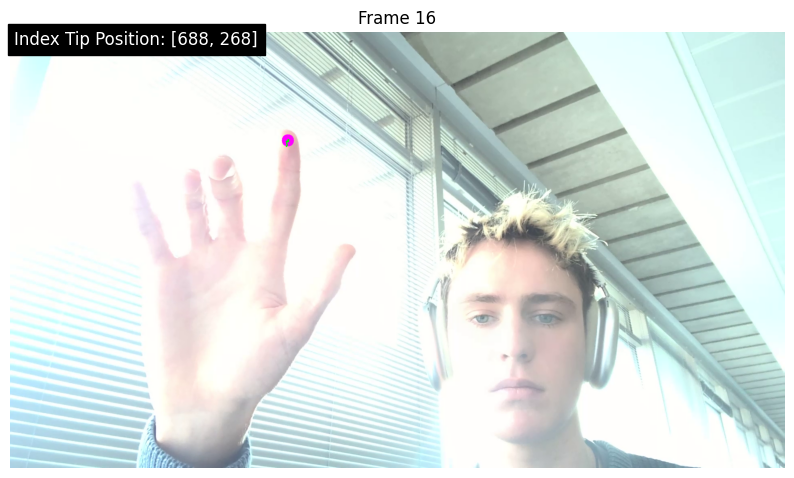

In [ ]:
# Usage
video_path = "/kaggle/input/test-11/WIN_20250221_15_14_49_Pro.mp4" 
img = process_video_with_hands(video_path, display_frequency=1)

img = img.reshape(-1, 784)

prediction = model.predict(img)
max_val = 0
idx = 0
for i in range(10):
    if prediction[0][i] > max_val:
        max_val = prediction[0][i]
        idx = i

print("THE DIGIT IS: ", idx)
print(prediction)